In [5]:
import pandas as pd

covid_data = pd.read_csv('covid_data.csv')
#print(covid_data.head())

vaccinations_data = pd.read_csv('country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
#print(vaccinations_data.head())

#Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

#Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])

#Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

#Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей.
# Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и
# рассчитаем разницу между «вчера и сегодня» с помощью метода diff():
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
print(covid_data.head())

#В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])


print(min(covid_data['date']), max(covid_data['date']))
print(min(vaccinations_data['date']), max(vaccinations_data['date']))

#С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
# Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период,
# вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data 
# и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.

covid_df = covid_data.merge(
    vaccinations_data, 
    on = ['date', 'country'],
    how='left')
print(covid_df.info())
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

#создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) 
# и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) 
# и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] *100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] *100

#максимальная летальность в США (United States)
print(round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2))
#Чему равен средний процент выздоровевших в России (Russia)?
print(round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2))


            date      country  confirmed  deaths  recovered  active  \
11337 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
11570 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
11807 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
12051 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
12299 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

       daily_confirmed  daily_deaths  daily_recovered  
11337              NaN           NaN              NaN  
11570              0.0           0.0              0.0  
11807              0.0           0.0              0.0  
12051              0.0           0.0              0.0  
12299              0.0           0.0              0.0  
2020-01-22 00:00:00 2021-05-29 00:00:00
2020-12-02 00:00:00 2021-09-06 00:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Nu

In [1]:
#!pip install seaborn

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.10.0'

In [7]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()


,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


Text(0.5, 1, 'Тепловая карта заболеваемости')

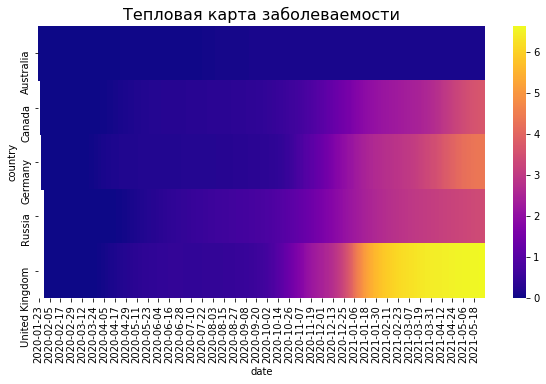

In [8]:
#Создайте новый признак confirmed_per_hundred, который покажет процентное отношение заболевших вирусом к общему числу населения в странах ().
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)

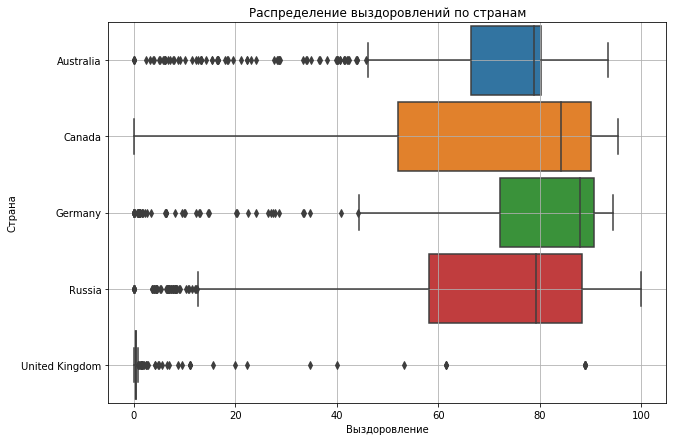

In [9]:
#Постройте коробчатую диаграмму для признака recover_rate (отношение выздоровлений к числу зафиксированных случаев заболевания в процентах).
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение выздоровлений по странам');
boxplot.set_xlabel('Выздоровление');
boxplot.set_ylabel('Страна');
boxplot.grid()